In [1]:
import os
import random

import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import torch
import matplotlib.pyplot as plt
import re

random.seed(123)
torch.manual_seed(123)
np.random.seed(123)

os.chdir('../models/')
from CoreSNN import *
os.chdir('../tsa/')
from ExplanationCreation import *
from ExplanationEvaluation import *

In [4]:
dataset = load_obj('data/dataset_max.pkl')
A_testset_t = load_obj('data/quantitative_test_t_A_final.pkl')
B_testset_t = load_obj('data/quantitative_test_t_B_final.pkl')
A_y_true = dataset['y_test_A'][:, A_testset_t]
B_y_true = dataset['y_test_B'][:, B_testset_t]

# Attribution sufficiency

## Read result data

In [ ]:
os.chdir('') #Add path to results
files_sufficiency = os.listdir('sufficiency')

def get_scores_ns(modelname):
    _, y_pred_A_0_ns, y_pred_p_A_0_ns = load_obj(os.getcwd() + '/sufficiency/tsa-ns/'+modelname+'_sufficiency_A_theta0.pkl')
    _, y_pred_A_5_ns, y_pred_p_A_5_ns = load_obj(os.getcwd() + '/sufficiency/tsa-ns/'+modelname+'_sufficiency_A_theta5.pkl')
    _, y_pred_A_10_ns, y_pred_p_A_10_ns = load_obj(os.getcwd() + '/sufficiency/tsa-ns/'+modelname+'_sufficiency_A_theta10.pkl')
    _, y_pred_A_15_ns, y_pred_p_A_15_ns = load_obj(os.getcwd() + '/sufficiency/tsa-ns/'+modelname+'_sufficiency_A_theta15.pkl')
    _, y_pred_A_20_ns, y_pred_p_A_20_ns = load_obj(os.getcwd() + '/sufficiency/tsa-ns/'+modelname+'_sufficiency_A_theta20.pkl')
    _, y_pred_A_25_ns, y_pred_p_A_25_ns = load_obj(os.getcwd() + '/sufficiency/tsa-ns/'+modelname+'_sufficiency_A_theta25.pkl')
    _, y_pred_A_50_ns, y_pred_p_A_50_ns= load_obj(os.getcwd() + '/sufficiency/tsa-ns/'+modelname+'_sufficiency_A_theta50.pkl')
    _, y_pred_A_75_ns, y_pred_p_A_75_ns = load_obj(os.getcwd() + '/sufficiency/tsa-ns/'+modelname+'_sufficiency_A_theta75.pkl')

    _, y_pred_B_0_ns, y_pred_p_B_0_ns = load_obj(os.getcwd() + '/sufficiency/tsa-ns/'+modelname+'_sufficiency_B_theta0.pkl')
    _, y_pred_B_5_ns, y_pred_p_B_5_ns = load_obj(os.getcwd() + '/sufficiency/tsa-ns/'+modelname+'_sufficiency_B_theta5.pkl')
    _, y_pred_B_10_ns, y_pred_p_B_10_ns = load_obj(os.getcwd() + '/sufficiency/tsa-ns/'+modelname+'_sufficiency_B_theta10.pkl')
    _, y_pred_B_15_ns, y_pred_p_B_15_ns = load_obj(os.getcwd() + '/sufficiency/tsa-ns/'+modelname+'_sufficiency_B_theta15.pkl')
    _, y_pred_B_20_ns, y_pred_p_B_20_ns = load_obj(os.getcwd() + '/sufficiency/tsa-ns/'+modelname+'_sufficiency_B_theta20.pkl')
    _, y_pred_B_25_ns, y_pred_p_B_25_ns = load_obj(os.getcwd() + '/sufficiency/tsa-ns/'+modelname+'_sufficiency_B_theta25.pkl')
    _, y_pred_B_50_ns, y_pred_p_B_50_ns= load_obj(os.getcwd() + '/sufficiency/tsa-ns/'+modelname+'_sufficiency_B_theta50.pkl')
    _, y_pred_B_75_ns, y_pred_p_B_75_ns = load_obj(os.getcwd() + '/sufficiency/tsa-ns/'+modelname+'_sufficiency_B_theta75.pkl')

    scores_ns = [balanced_accuracy_score([*y_pred_A_0_ns, *y_pred_B_0_ns], [*y_pred_p_A_0_ns, *y_pred_p_B_0_ns]),
                  balanced_accuracy_score([*y_pred_A_5_ns, *y_pred_B_5_ns], [*y_pred_p_A_5_ns, *y_pred_p_B_5_ns]),
                  balanced_accuracy_score([*y_pred_A_10_ns, *y_pred_B_10_ns], [*y_pred_p_A_10_ns, *y_pred_p_B_10_ns]),
                  balanced_accuracy_score([*y_pred_A_15_ns, *y_pred_B_15_ns], [*y_pred_p_A_15_ns, *y_pred_p_B_15_ns]),
                  balanced_accuracy_score([*y_pred_A_20_ns, *y_pred_B_20_ns], [*y_pred_p_A_20_ns, *y_pred_p_B_20_ns]),
                  balanced_accuracy_score([*y_pred_A_25_ns, *y_pred_B_25_ns], [*y_pred_p_A_25_ns, *y_pred_p_B_25_ns]),
                  balanced_accuracy_score([*y_pred_A_50_ns, *y_pred_B_50_ns], [*y_pred_p_A_50_ns, *y_pred_p_B_50_ns]),
                  balanced_accuracy_score([*y_pred_A_75_ns, *y_pred_B_75_ns], [*y_pred_p_A_75_ns, *y_pred_p_B_75_ns])]
    return scores_ns

def get_scores_s(modelname):
    _, y_pred_A_0_s, y_pred_p_A_0_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/'+modelname+'_sufficiency_A_theta0.pkl')
    _, y_pred_A_5_s, y_pred_p_A_5_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/'+modelname+'_sufficiency_A_theta5.pkl')
    _, y_pred_A_10_s, y_pred_p_A_10_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/'+modelname+'_sufficiency_A_theta10.pkl')
    _, y_pred_A_15_s, y_pred_p_A_15_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/'+modelname+'_sufficiency_A_theta15.pkl')
    _, y_pred_A_20_s, y_pred_p_A_20_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/'+modelname+'_sufficiency_A_theta20.pkl')
    _, y_pred_A_25_s, y_pred_p_A_25_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/'+modelname+'_sufficiency_A_theta25.pkl')
    _, y_pred_A_50_s, y_pred_p_A_50_s= load_obj(os.getcwd() + '/sufficiency/tsa-s/'+modelname+'_sufficiency_A_theta50.pkl')
    _, y_pred_A_75_s, y_pred_p_A_75_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/'+modelname+'_sufficiency_A_theta75.pkl')

    _, y_pred_B_0_s, y_pred_p_B_0_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/'+modelname+'_sufficiency_B_theta0.pkl')
    _, y_pred_B_5_s, y_pred_p_B_5_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/'+modelname+'_sufficiency_B_theta5.pkl')
    _, y_pred_B_10_s, y_pred_p_B_10_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/'+modelname+'_sufficiency_B_theta10.pkl')
    _, y_pred_B_15_s, y_pred_p_B_15_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/'+modelname+'_sufficiency_B_theta15.pkl')
    _, y_pred_B_20_s, y_pred_p_B_20_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/'+modelname+'_sufficiency_B_theta20.pkl')
    _, y_pred_B_25_s, y_pred_p_B_25_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/'+modelname+'_sufficiency_B_theta25.pkl')
    _, y_pred_B_50_s, y_pred_p_B_50_s= load_obj(os.getcwd() + '/sufficiency/tsa-s/'+modelname+'_sufficiency_B_theta50.pkl')
    _, y_pred_B_75_s, y_pred_p_B_75_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/'+modelname+'_sufficiency_B_theta75.pkl')

    scores_s = [balanced_accuracy_score([*y_pred_A_0_s, *y_pred_B_0_s], [*y_pred_p_A_0_s, *y_pred_p_B_0_s]),
                  balanced_accuracy_score([*y_pred_A_5_s, *y_pred_B_5_s], [*y_pred_p_A_5_s, *y_pred_p_B_5_s]),
                  balanced_accuracy_score([*y_pred_A_10_s, *y_pred_B_10_s], [*y_pred_p_A_10_s, *y_pred_p_B_10_s]),
                  balanced_accuracy_score([*y_pred_A_15_s, *y_pred_B_15_s], [*y_pred_p_A_15_s, *y_pred_p_B_15_s]),
                  balanced_accuracy_score([*y_pred_A_20_s, *y_pred_B_20_s], [*y_pred_p_A_20_s, *y_pred_p_B_20_s]),
                  balanced_accuracy_score([*y_pred_A_25_s, *y_pred_B_25_s], [*y_pred_p_A_25_s, *y_pred_p_B_25_s]),
                  balanced_accuracy_score([*y_pred_A_50_s, *y_pred_B_50_s], [*y_pred_p_A_50_s, *y_pred_p_B_50_s]),
                  balanced_accuracy_score([*y_pred_A_75_s, *y_pred_B_75_s], [*y_pred_p_A_75_s, *y_pred_p_B_75_s])]
    return scores_s

def get_baseline_scores_ns(modelname):
    _, y_pred_A_0_ns, y_pred_p_A_0_ns = load_obj(os.getcwd() + '/sufficiency/tsa_ns/baseline_'+modelname+'_sufficiency_A_theta0.pkl')
    _, y_pred_A_5_ns, y_pred_p_A_5_ns = load_obj(os.getcwd() + '/sufficiency/tsa_ns/baseline_'+modelname+'_sufficiency_A_theta5.pkl')
    _, y_pred_A_10_ns, y_pred_p_A_10_ns = load_obj(os.getcwd() + '/sufficiency/tsa_ns/baseline_'+modelname+'_sufficiency_A_theta10.pkl')
    _, y_pred_A_15_ns, y_pred_p_A_15_ns = load_obj(os.getcwd() + '/sufficiency/tsa_ns/baseline_'+modelname+'_sufficiency_A_theta15.pkl')
    _, y_pred_A_20_ns, y_pred_p_A_20_ns = load_obj(os.getcwd() + '/sufficiency/tsa_ns/baseline_'+modelname+'_sufficiency_A_theta20.pkl')
    _, y_pred_A_25_ns, y_pred_p_A_25_ns = load_obj(os.getcwd() + '/sufficiency/tsa_ns/baseline_'+modelname+'_sufficiency_A_theta25.pkl')
    _, y_pred_A_50_ns, y_pred_p_A_50_ns= load_obj(os.getcwd() + '/sufficiency/tsa_ns/baseline_'+modelname+'_sufficiency_A_theta50.pkl')
    _, y_pred_A_75_ns, y_pred_p_A_75_ns = load_obj(os.getcwd() + '/sufficiency/tsa_ns/baseline_'+modelname+'_sufficiency_A_theta75.pkl')

    _, y_pred_B_0_ns, y_pred_p_B_0_ns = load_obj(os.getcwd() + '/sufficiency/tsa_ns/baseline_'+modelname+'_sufficiency_B_theta0.pkl')
    _, y_pred_B_5_ns, y_pred_p_B_5_ns = load_obj(os.getcwd() + '/sufficiency/tsa_ns/baseline_'+modelname+'_sufficiency_B_theta5.pkl')
    _, y_pred_B_10_ns, y_pred_p_B_10_ns = load_obj(os.getcwd() + '/sufficiency/tsa_ns/baseline_'+modelname+'_sufficiency_B_theta10.pkl')
    _, y_pred_B_15_ns, y_pred_p_B_15_ns = load_obj(os.getcwd() + '/sufficiency/tsa_ns/baseline_'+modelname+'_sufficiency_B_theta15.pkl')
    _, y_pred_B_20_ns, y_pred_p_B_20_ns = load_obj(os.getcwd() + '/sufficiency/tsa_ns/baseline_'+modelname+'_sufficiency_B_theta20.pkl')
    _, y_pred_B_25_ns, y_pred_p_B_25_ns = load_obj(os.getcwd() + '/sufficiency/tsa_ns/baseline_'+modelname+'_sufficiency_B_theta25.pkl')
    _, y_pred_B_50_ns, y_pred_p_B_50_ns= load_obj(os.getcwd() + '/sufficiency/tsa_ns/baseline_'+modelname+'_sufficiency_B_theta50.pkl')
    _, y_pred_B_75_ns, y_pred_p_B_75_ns = load_obj(os.getcwd() + '/sufficiency/tsa_ns/baseline_'+modelname+'_sufficiency_B_theta75.pkl')

    scores_ns = [balanced_accuracy_score([*y_pred_A_0_ns, *y_pred_B_0_ns], [*y_pred_p_A_0_ns, *y_pred_p_B_0_ns]),
                  balanced_accuracy_score([*y_pred_A_5_ns, *y_pred_B_5_ns], [*y_pred_p_A_5_ns, *y_pred_p_B_5_ns]),
                  balanced_accuracy_score([*y_pred_A_10_ns, *y_pred_B_10_ns], [*y_pred_p_A_10_ns, *y_pred_p_B_10_ns]),
                  balanced_accuracy_score([*y_pred_A_15_ns, *y_pred_B_15_ns], [*y_pred_p_A_15_ns, *y_pred_p_B_15_ns]),
                  balanced_accuracy_score([*y_pred_A_20_ns, *y_pred_B_20_ns], [*y_pred_p_A_20_ns, *y_pred_p_B_20_ns]),
                  balanced_accuracy_score([*y_pred_A_25_ns, *y_pred_B_25_ns], [*y_pred_p_A_25_ns, *y_pred_p_B_25_ns]),
                  balanced_accuracy_score([*y_pred_A_50_ns, *y_pred_B_50_ns], [*y_pred_p_A_50_ns, *y_pred_p_B_50_ns]),
                  balanced_accuracy_score([*y_pred_A_75_ns, *y_pred_B_75_ns], [*y_pred_p_A_75_ns, *y_pred_p_B_75_ns])]
    return scores_ns

def get_baseline_scores_s(modelname):
    _, y_pred_A_0_s, y_pred_p_A_0_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/baseline_'+modelname+'_sufficiency_A_theta0.pkl')
    _, y_pred_A_5_s, y_pred_p_A_5_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/baseline_'+modelname+'_sufficiency_A_theta5.pkl')
    _, y_pred_A_10_s, y_pred_p_A_10_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/baseline_'+modelname+'_sufficiency_A_theta10.pkl')
    _, y_pred_A_15_s, y_pred_p_A_15_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/baseline_'+modelname+'_sufficiency_A_theta15.pkl')
    _, y_pred_A_20_s, y_pred_p_A_20_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/baseline_'+modelname+'_sufficiency_A_theta20.pkl')
    _, y_pred_A_25_s, y_pred_p_A_25_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/baseline_'+modelname+'_sufficiency_A_theta25.pkl')
    _, y_pred_A_50_s, y_pred_p_A_50_s= load_obj(os.getcwd() + '/sufficiency/tsa-s/baseline_'+modelname+'_sufficiency_A_theta50.pkl')
    _, y_pred_A_75_s, y_pred_p_A_75_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/baseline_'+modelname+'_sufficiency_A_theta75.pkl')

    _, y_pred_B_0_s, y_pred_p_B_0_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/baseline_'+modelname+'_sufficiency_B_theta0.pkl')
    _, y_pred_B_5_s, y_pred_p_B_5_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/baseline_'+modelname+'_sufficiency_B_theta5.pkl')
    _, y_pred_B_10_s, y_pred_p_B_10_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/baseline_'+modelname+'_sufficiency_B_theta10.pkl')
    _, y_pred_B_15_s, y_pred_p_B_15_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/baseline_'+modelname+'_sufficiency_B_theta15.pkl')
    _, y_pred_B_20_s, y_pred_p_B_20_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/baseline_'+modelname+'_sufficiency_B_theta20.pkl')
    _, y_pred_B_25_s, y_pred_p_B_25_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/baseline_'+modelname+'_sufficiency_B_theta25.pkl')
    _, y_pred_B_50_s, y_pred_p_B_50_s= load_obj(os.getcwd() + '/sufficiency/tsa-s/baseline_'+modelname+'_sufficiency_B_theta50.pkl')
    _, y_pred_B_75_s, y_pred_p_B_75_s = load_obj(os.getcwd() + '/sufficiency/tsa-s/baseline_'+modelname+'_sufficiency_B_theta75.pkl')

    scores_s = [balanced_accuracy_score([*y_pred_A_0_s, *y_pred_B_0_s], [*y_pred_p_A_0_s, *y_pred_p_B_0_s]),
                  balanced_accuracy_score([*y_pred_A_5_s, *y_pred_B_5_s], [*y_pred_p_A_5_s, *y_pred_p_B_5_s]),
                  balanced_accuracy_score([*y_pred_A_10_s, *y_pred_B_10_s], [*y_pred_p_A_10_s, *y_pred_p_B_10_s]),
                  balanced_accuracy_score([*y_pred_A_15_s, *y_pred_B_15_s], [*y_pred_p_A_15_s, *y_pred_p_B_15_s]),
                  balanced_accuracy_score([*y_pred_A_20_s, *y_pred_B_20_s], [*y_pred_p_A_20_s, *y_pred_p_B_20_s]),
                  balanced_accuracy_score([*y_pred_A_25_s, *y_pred_B_25_s], [*y_pred_p_A_25_s, *y_pred_p_B_25_s]),
                  balanced_accuracy_score([*y_pred_A_50_s, *y_pred_B_50_s], [*y_pred_p_A_50_s, *y_pred_p_B_50_s]),
                  balanced_accuracy_score([*y_pred_A_75_s, *y_pred_B_75_s], [*y_pred_p_A_75_s, *y_pred_p_B_75_s])]
    return scores_s

In [ ]:
scores_one_s = get_scores_s('onelayer')
scores_two_s = get_scores_s('twolayer')
scores_three_s = get_scores_s('threelayer')
scores_baseline_one_s = get_baseline_scores_s('onelayer')
scores_baseline_two_s = get_baseline_scores_s('twolayer')
scores_baseline_three_s = get_baseline_scores_s('threelayer')

scores_one_ns = get_scores_ns('onelayer')
scores_two_ns = get_scores_ns('twolayer')
scores_three_ns = get_scores_ns('threelayer')
scores_baseline_one_ns = get_baseline_scores_ns('onelayer')
scores_baseline_two_ns = get_baseline_scores_ns('twolayer')
scores_baseline_three_ns = get_baseline_scores_ns('threelayer')

## Visualize results

In [ ]:
overall_sufficiency = [(one+two+three)/3 for one, two, three in zip(scores_one_s, scores_two_s, scores_three_s)]
overall_sufficiency_baseline = [(one+two+three)/3 for one, two, three in zip(scores_baseline_one_s, scores_baseline_two_s, scores_baseline_three_s)]

Text(0.5, 0, 'Theta')

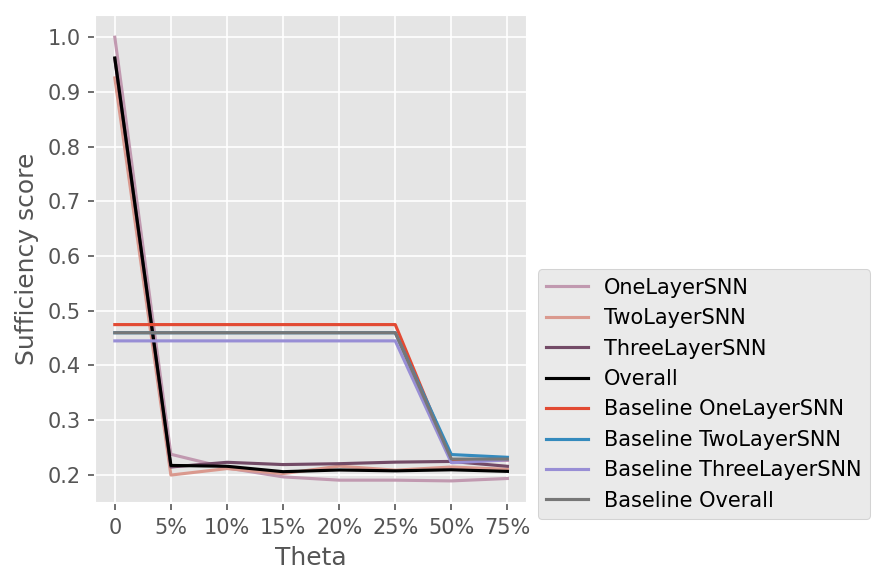

In [ ]:

# fig = plt.figure(tight_layout=True, dpi=150, frameon=False)
# plt.plot(scores_one, color=(194/256, 154/256, 177/256))
# plt.plot(scores_two, color=(219/256, 154/256, 143/256))
# plt.plot(scores_three, color=(115/256, 75/256, 103/256))
# plt.plot(overall_sufficiency, color=(0/256, 0/256, 0/256))
# plt.plot(scores_one_baseline)
# plt.plot(scores_two_baseline)
# plt.plot(scores_three_baseline)
# plt.plot(overall_sufficiency_baseline)
# #plt.title('Attribution sufficiency of TSA per theta', pad=10)
# plt.xticks(range(8), labels=[0, '5%', '10%', '15%', '20%', '25%', '50%', '75%'])
# plt.legend(['OneLayerSNN', 'TwoLayerSNN', 'ThreeLayerSNN', 'Overall', 'Baseline OneLayerSNN', 'Baseline TwoLayerSNN', 'Baseline ThreeLayerSNN', 'Baseline Overall'], bbox_to_anchor=(1.0, 0.5)) #
# plt.ylabel('Sufficiency score')
# plt.xlabel('Theta')

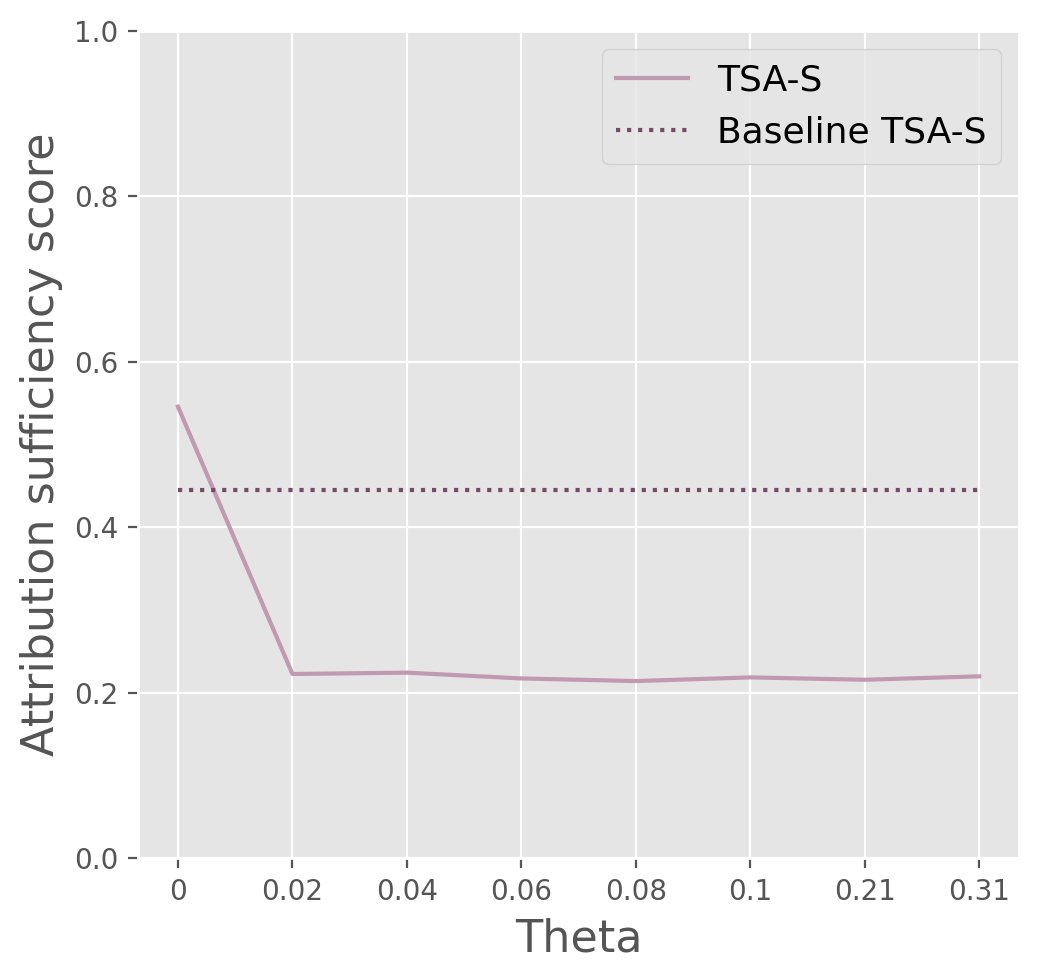

In [ ]:
fig = plt.figure(tight_layout=True, frameon=False, figsize=(15,5),dpi=200)
gs = gridspec.GridSpec(1,3)

# ax1 = fig.add_subplot(gs[0,0])
# ax1.plot(scores_one_s, color = (194/256, 154/256, 177/256))
# ax1.plot(scores_baseline_one_s, color=(115/256, 75/256, 103/256), linestyle='dotted')
# ax1.set_ylim(ymin = 0, ymax=1)
# ax1.set_ylabel('Attribution sufficiency score', fontdict={'fontsize': 16})
# ax1.set_xticks(range(8))
# ax1.set_xticklabels([0, 0.02, 0.04, 0.06, 0.08, 0.10, 0.21, 0.31])
# ax1.set_xlabel('Theta', fontdict={'fontsize': 16})
# # ax1.set_title('Attribution sufficiency for TSA of OneLayerSNN', pad=10)
# ax1.legend(['TSA-S', 'Baseline TSA-S'], prop={'size':13})

# ax2 = fig.add_subplot(gs[0,1])
# ax2.plot(scores_two_s,  color= (194/256, 154/256, 177/256))
# ax2.plot(scores_baseline_two_s, color=(115/256, 75/256, 103/256), linestyle='dotted')
# ax2.set_ylim(ymin = 0, ymax=1)
# ax2.set_ylabel('Attribution sufficiency score', fontdict={'fontsize': 16})
# ax2.set_xticks(range(8))
# ax2.set_xticklabels([0, 0.02, 0.04, 0.06, 0.08, 0.10, 0.21, 0.31])
# ax2.set_xlabel('Theta', fontdict={'fontsize': 16})
# # ax2.set_title('Attribution sufficiency for TSA of TwoLayerSNN', pad=10)
# ax2.legend(['TSA-S', 'Baseline TSA-S'], prop={'size':13})

ax3 = fig.add_subplot(gs[0,2])
ax3.plot(scores_three_s, color= (194/256, 154/256, 177/256))
ax3.plot(scores_baseline_three_s, color=(115/256, 75/256, 103/256), linestyle='dotted')
ax3.set_ylim(ymin = 0, ymax=1)
ax3.set_ylabel('Attribution sufficiency score', fontdict={'fontsize': 16})
ax3.set_xticks(range(8))
ax3.set_xticklabels([0, 0.02, 0.04, 0.06, 0.08, 0.10, 0.21, 0.31])
ax3.set_xlabel('Theta', fontdict={'fontsize': 16})
# ax3.set_title('Attribution sufficiency for TSA of ThreeLayerSNN', pad=10)
ax3.legend(['TSA-S', 'Baseline TSA-S'], prop={'size':13})

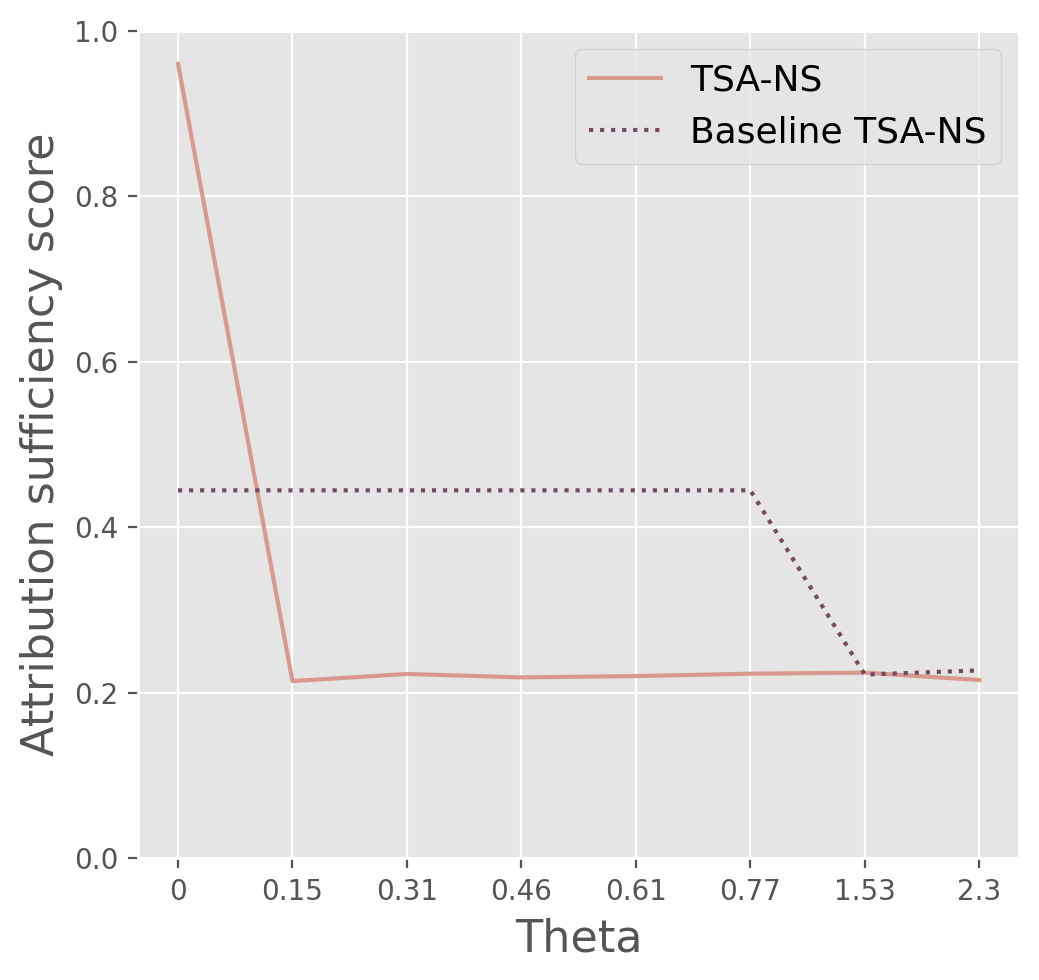

In [ ]:
fig = plt.figure(tight_layout=True, frameon=False, figsize=(15,5),dpi=200)
gs = gridspec.GridSpec(1,3)

# ax1 = fig.add_subplot(gs[0,0])
# ax1.plot(scores_one_ns, color=(219/256, 154/256, 143/256))
# ax1.plot(scores_baseline_one_ns,color=(115/256, 75/256, 103/256), linestyle='dotted')
# ax1.set_ylim(ymin = 0, ymax=1)
# ax1.set_ylabel('Attribution sufficiency score', fontdict={'fontsize': 16})
# ax1.set_xticks(range(8))
# ax1.set_xticklabels([0, 0.15, 0.31, 0.46, 0.61, 0.77, 1.53, 2.30])
# ax1.set_xlabel('Theta', fontdict={'fontsize': 16})
# # ax1.set_title('Attribution sufficiency for TSA of OneLayerSNN', pad=10)
# ax1.legend(['TSA-NS', 'Baseline TSA-NS'], prop={'size':13})

# ax2 = fig.add_subplot(gs[0,1])
# ax2.plot(scores_two_ns, color=(219/256, 154/256, 143/256))
# ax2.plot(scores_baseline_two_ns,color=(115/256, 75/256, 103/256), linestyle='dotted')
# ax2.set_ylim(ymin = 0, ymax=1)
# ax2.set_ylabel('Attribution sufficiency score', fontdict={'fontsize': 16})
# ax2.set_xticks(range(8))
# ax2.set_xticklabels([0, 0.15, 0.31, 0.46, 0.61, 0.77, 1.53, 2.30])
# ax2.set_xlabel('Theta', fontdict={'fontsize': 16})
# # ax2.set_title('Attribution sufficiency for TSA of TwoLayerSNN', pad=10)
# ax2.legend(['TSA-NS', 'Baseline TSA-NS'], prop={'size':13})

ax3 = fig.add_subplot(gs[0,2])
ax3.plot(scores_three_ns, color=(219/256, 154/256, 143/256))
ax3.plot(scores_baseline_three_ns,color=(115/256, 75/256, 103/256), linestyle='dotted')
ax3.set_ylim(ymin = 0, ymax=1)
ax3.set_ylabel('Attribution sufficiency score', fontdict={'fontsize': 16})
ax3.set_xticks(range(8))
ax3.set_xticklabels([0, 0.15, 0.31, 0.46, 0.61, 0.77, 1.53, 2.30])
ax3.set_xlabel('Theta', fontdict={'fontsize': 16})
# ax3.set_title('Attribution sufficiency for TSA of ThreeLayerSNN', pad=10)
ax3.legend(['TSA-NS', 'Baseline TSA-NS'], prop={'size':13})

In [ ]:

n=180
CIs_one = print([conf_interval(score, n) for score in scores_one_s][0])
CIs_two = print([conf_interval(score, n) for score in scores_two_s][0])
CIs_three = print([conf_interval(score, n) for score in scores_three_s][0])
CIs_overall = print([conf_interval(score, n) for score in overall_sufficiency][0])
CIs_one_baseline = print([conf_interval(score, n) for score in scores_baseline_one_s][0])
CIs_two_baseline = print([conf_interval(score, n) for score in scores_baseline_two_s][0])
CIs_three_baseline = print([conf_interval(score, n) for score in scores_baseline_three_s][0])
CIs_overall_baseline = print([conf_interval(score, n) for score in overall_sufficiency_baseline][0])


0.0716433365003901
0.06924229019673898
0.0727366117333272
0.07154324989589761
0.07295097340318023
0.07280803985744787
0.07259971503906831
0.07280803985744787


In [ ]:
df_sufficiency = pd.DataFrame([scores_one_s, scores_two_s, scores_three_s, overall_sufficiency, scores_baseline_one_s, scores_baseline_two_s, scores_baseline_three_s, overall_sufficiency_baseline])
df_sufficiency.columns = [0, '5%', '10%', '15%', '20%', '25%', '50%', '75%']
df_sufficiency

,0,5%,10%,15%,20%,25%,50%,75%
0,0.597477,0.457580,0.385515,0.358826,0.319315,0.298283,0.201819,0.202919
1,0.659222,0.199367,0.209840,0.196515,0.204135,0.215989,0.196515,0.218930
2,0.545888,0.222937,0.224524,0.217540,0.214365,0.218810,0.215952,0.220079
3,0.600862,0.293295,0.273293,0.257627,0.245938,0.244361,0.204762,0.213976
4,0.474654,0.474654,0.474654,0.474654,0.474654,0.474654,0.474654,0.474654
5,0.459768,0.459768,0.459768,0.459768,0.459768,0.459768,0.459768,0.459768
6,0.444882,0.444882,0.444882,0.444882,0.444882,0.444882,0.444882,0.444882
7,0.459768,0.459768,0.459768,0.459768,0.459768,0.459768,0.459768,0.459768


In [ ]:
sum(overall_sufficiency)/4


0.3518939393939394

# Faithfulness

## Reading the data

In [5]:
# Perhaps adjust the paths

y_preds_p_oneA_ns = load_obj(os.getcwd()+'/faithfulness/tsa-ns/y_preds_perturbed_onelayer_A.pkl')
y_preds_p_oneB_ns = load_obj(os.getcwd()+'/faithfulness/tsa-ns/y_preds_perturbed_onelayer_B.pkl')
y_preds_p_twoA_ns = load_obj(os.getcwd()+'/faithfulness/tsa-ns/y_preds_perturbed_twolayer_A.pkl')
y_preds_p_twoB_ns = load_obj(os.getcwd()+'/faithfulness/tsa-ns/y_preds_perturbed_twolayer_B.pkl')
y_preds_p_threeA_ns = load_obj(os.getcwd()+'/faithfulness/tsa-ns/y_preds_perturbed_threelayer_A.pkl')
y_preds_p_threeB_ns = load_obj(os.getcwd()+'/faithfulness/tsa-ns/y_preds_perturbed_threelayer_B.pkl')

y_preds_p_oneA_s = load_obj(os.getcwd()+'/faithfulness/tsa-s/y_preds_perturbed_onelayer_A.pkl')
y_preds_p_oneB_s = load_obj(os.getcwd()+'/faithfulness/tsa-s/y_preds_perturbed_onelayer_B.pkl')
y_preds_p_twoA_s = load_obj(os.getcwd()+'/faithfulness/tsa-s/y_preds_perturbed_twolayer_A.pkl')
y_preds_p_twoB_s = load_obj(os.getcwd()+'/faithfulness/tsa-s/y_preds_perturbed_twolayer_B.pkl')
y_preds_p_threeA_s = load_obj(os.getcwd()+'/faithfulness/tsa-s/y_preds_perturbed_threelayer_A.pkl')
y_preds_p_threeB_s = load_obj(os.getcwd()+'/faithfulness/tsa-s/y_preds_perturbed_threelayer_B.pkl')

y_preds_p_oneA_baseline = load_obj(os.getcwd()+'/faithfulness/baseline_y_preds_perturbed_onelayer_A.pkl')
y_preds_p_oneB_baseline = load_obj(os.getcwd()+'/faithfulness/baseline_y_preds_perturbed_onelayer_B.pkl')
y_preds_p_twoA_baseline = load_obj(os.getcwd()+'/faithfulness/baseline_y_preds_perturbed_twolayer_A.pkl')
y_preds_p_twoB_baseline = load_obj(os.getcwd()+'/faithfulness/baseline_y_preds_perturbed_twolayer_B.pkl')
y_preds_p_threeA_baseline = load_obj(os.getcwd()+'/faithfulness/baseline_y_preds_perturbed_threelayer_A.pkl')
y_preds_p_threeB_baseline = load_obj(os.getcwd()+'/faithfulness/baseline_y_preds_perturbed_threelayer_B.pkl')

In [6]:
# no feature segments found for A t=9 in the explanations extracted from ThreeLayerSNN, so only consider the original prediction 
y_preds_p_threeA_s[37] = [5]

## Normalization and combination of the results per model

In [7]:
def get_perf_curve_yhat(y_preds_p_A, y_preds_p_B):
    y_hat = [pred[0] for pred in y_preds_p_A]
    y_hat_B = [pred[0] for pred in y_preds_p_B]
    y_hat.extend(y_hat_B)

    perf = []
    for i in range(max([len(y_pred) for y_pred in y_preds_p_A])):
        y_pred_p = [pred[i] if i<len(pred) else pred[-1] for pred in y_preds_p_A]
        y_pred_p_B = [pred[i] if i<len(pred) else pred[-1] for pred in y_preds_p_B]
        y_pred_p.extend(y_pred_p_B)
        perf.append(balanced_accuracy_score(y_hat, y_pred_p))
    return perf

def get_perf_curve_ytrue(y_preds_p_A, y_preds_p_B):
    perf = []
    for i in range(max([len(y_pred) for y_pred in y_preds_p_A])):
        y_pred_p = [pred[i] if i<len(pred) else pred[-1] for pred in y_preds_p_A]
        y_pred_p_B = [pred[i] if i<len(pred) else pred[-1] for pred in y_preds_p_B]
        y_pred_p.extend(y_pred_p_B)
        perf.append(balanced_accuracy_score([*A_y_true[0], *B_y_true[0]], y_pred_p))
    return perf

In [8]:
perf_one_yhat_ns = get_perf_curve_yhat(y_preds_p_oneA_ns, y_preds_p_oneB_ns)
perf_one_ytrue_ns = get_perf_curve_ytrue(y_preds_p_oneA_ns, y_preds_p_oneB_ns)
perf_one_yhat_s = get_perf_curve_yhat(y_preds_p_oneA_s, y_preds_p_oneB_s)
perf_one_ytrue_s = get_perf_curve_ytrue(y_preds_p_oneA_s, y_preds_p_oneB_s)
perf_one_yhat_baseline = get_perf_curve_yhat(y_preds_p_oneA_baseline, y_preds_p_oneB_baseline)
perf_one_ytrue_baseline = get_perf_curve_ytrue(y_preds_p_oneA_baseline, y_preds_p_oneB_baseline)

perf_two_yhat_ns = get_perf_curve_yhat(y_preds_p_twoA_ns, y_preds_p_twoB_ns)
perf_two_ytrue_ns = get_perf_curve_ytrue(y_preds_p_twoA_ns, y_preds_p_twoB_ns)
perf_two_yhat_s = get_perf_curve_yhat(y_preds_p_twoA_s, y_preds_p_twoB_s)
perf_two_ytrue_s = get_perf_curve_ytrue(y_preds_p_twoA_s, y_preds_p_twoB_s)
perf_two_yhat_baseline = get_perf_curve_yhat(y_preds_p_twoA_baseline, y_preds_p_twoB_baseline)
perf_two_ytrue_baseline = get_perf_curve_ytrue(y_preds_p_oneA_baseline, y_preds_p_oneB_baseline)

perf_three_yhat_ns = get_perf_curve_yhat(y_preds_p_threeA_ns, y_preds_p_threeB_ns)
perf_three_ytrue_ns = get_perf_curve_ytrue(y_preds_p_threeA_ns, y_preds_p_threeB_ns)
perf_three_yhat_s = get_perf_curve_yhat(y_preds_p_threeA_s, y_preds_p_threeB_s)
perf_three_ytrue_s = get_perf_curve_ytrue(y_preds_p_threeA_s, y_preds_p_threeB_s)
perf_three_yhat_baseline = get_perf_curve_yhat(y_preds_p_threeA_baseline, y_preds_p_threeB_baseline)
perf_three_ytrue_baseline = get_perf_curve_ytrue(y_preds_p_oneA_baseline, y_preds_p_oneB_baseline)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


In [10]:
ess_yhat_one_ns = metrics.auc(range(len(perf_one_yhat_ns)), perf_one_yhat_ns)
norm_ess_yhat_one_ns = ess_yhat_one_ns/len(perf_one_yhat_ns)
ess_yhat_one_s = metrics.auc(range(len(perf_one_yhat_s)), perf_one_yhat_s)
norm_ess_yhat_one_s = ess_yhat_one_s/len(perf_one_yhat_s)
ess_yhat_one_baseline = metrics.auc(range(len(perf_one_yhat_baseline)), perf_one_yhat_baseline)
norm_ess_yhat_one_baseline = ess_yhat_one_baseline/len(perf_one_yhat_baseline)

ess_yhat_two_ns = metrics.auc(range(len(perf_two_yhat_ns)), perf_two_yhat_ns)
norm_ess_yhat_two_ns = ess_yhat_two_ns/len(perf_two_yhat_ns)
ess_yhat_two_s = metrics.auc(range(len(perf_two_yhat_s)), perf_two_yhat_s)
norm_ess_yhat_two_s = ess_yhat_two_s/len(perf_two_yhat_s)
ess_yhat_two_baseline = metrics.auc(range(len(perf_two_yhat_baseline)), perf_two_yhat_baseline)
norm_ess_yhat_two_baseline = ess_yhat_two_baseline/len(perf_two_yhat_baseline)

ess_yhat_three_ns = metrics.auc(range(len(perf_three_yhat_ns)), perf_three_yhat_ns)
norm_ess_yhat_three_ns = ess_yhat_three_ns/len(perf_three_yhat_ns)
ess_yhat_three_s = metrics.auc(range(len(perf_three_yhat_s)), perf_three_yhat_s)
norm_ess_yhat_three_s = ess_yhat_three_s/len(perf_three_yhat_s)
ess_yhat_three_baseline = metrics.auc(range(len(perf_three_yhat_baseline)), perf_three_yhat_baseline)
norm_ess_yhat_three_baseline = ess_yhat_three_baseline/len(perf_three_yhat_baseline)

print('ESS for TSA-NS Explanations from OneLayerSNN: ', norm_ess_yhat_one_ns, ' +- ', conf_interval(norm_ess_yhat_one_ns, 180))
print('ESS for TSA-S Explanations from OneLayerSNN: ', norm_ess_yhat_one_s, ' +- ', conf_interval(norm_ess_yhat_one_s, 180))
print('ESS for Baseline Explanations from OneLayerSNN: ', norm_ess_yhat_one_baseline, ' +- ', conf_interval(norm_ess_yhat_one_baseline, 180))
print('ESS for TSA-NS Explanations from TwoLayerSNN: ', norm_ess_yhat_two_ns, ' +- ', conf_interval(norm_ess_yhat_two_ns, 180))
print('ESS for TSA-S Explanations from TwoLayerSNN: ', norm_ess_yhat_two_s, ' +- ', conf_interval(norm_ess_yhat_two_s, 180))
print('ESS for Baseline Explanations from TwoLayerSNN: ', norm_ess_yhat_two_baseline, ' +- ', conf_interval(norm_ess_yhat_two_baseline, 180))
print('ESS for TSA-NS Explanations from ThreeLayerSNN: ', norm_ess_yhat_three_ns, ' +- ', conf_interval(norm_ess_yhat_three_ns, 180))
print('ESS for TSA-S Explanations from ThreeLayerSNN: ', norm_ess_yhat_three_s, ' +- ', conf_interval(norm_ess_yhat_three_s, 180))
print('ESS for Baseline Explanations from ThreeLayerSNN: ', norm_ess_yhat_three_baseline, ' +- ', conf_interval(norm_ess_yhat_three_baseline, 180))

ESS for TSA-NS Explanations from OneLayerSNN:  0.023630120867713652  +-  0.022190136658020658
ESS for TSA-S Explanations from OneLayerSNN:  0.08557182873149259  +-  0.040865801769266054
ESS for Baseline Explanations from OneLayerSNN:  0.4110198822900922  +-  0.07187892136111775
ESS for TSA-NS Explanations from TwoLayerSNN:  0.24757243957185526  +-  0.0630526456925812
ESS for TSA-S Explanations from TwoLayerSNN:  0.6350972475767166  +-  0.07032803832245105
ESS for Baseline Explanations from TwoLayerSNN:  0.46247388442961357  +-  0.07283887175592899
ESS for TSA-NS Explanations from ThreeLayerSNN:  0.060918889055137565  +-  0.03494196776312689
ESS for TSA-S Explanations from ThreeLayerSNN:  0.541030637176148  +-  0.07279852775298988
ESS for Baseline Explanations from ThreeLayerSNN:  0.39240903846794617  +-  0.07133373633386822


In [ ]:
(norm_ess_yhat_one_baseline + norm_ess_yhat_two_baseline + norm_ess_yhat_three_baseline)/3

0.4219676017292173

Text(0.5, 1.0, 'Balanced accuracy of ThreeLayerSNN \n with flipped feature segments')

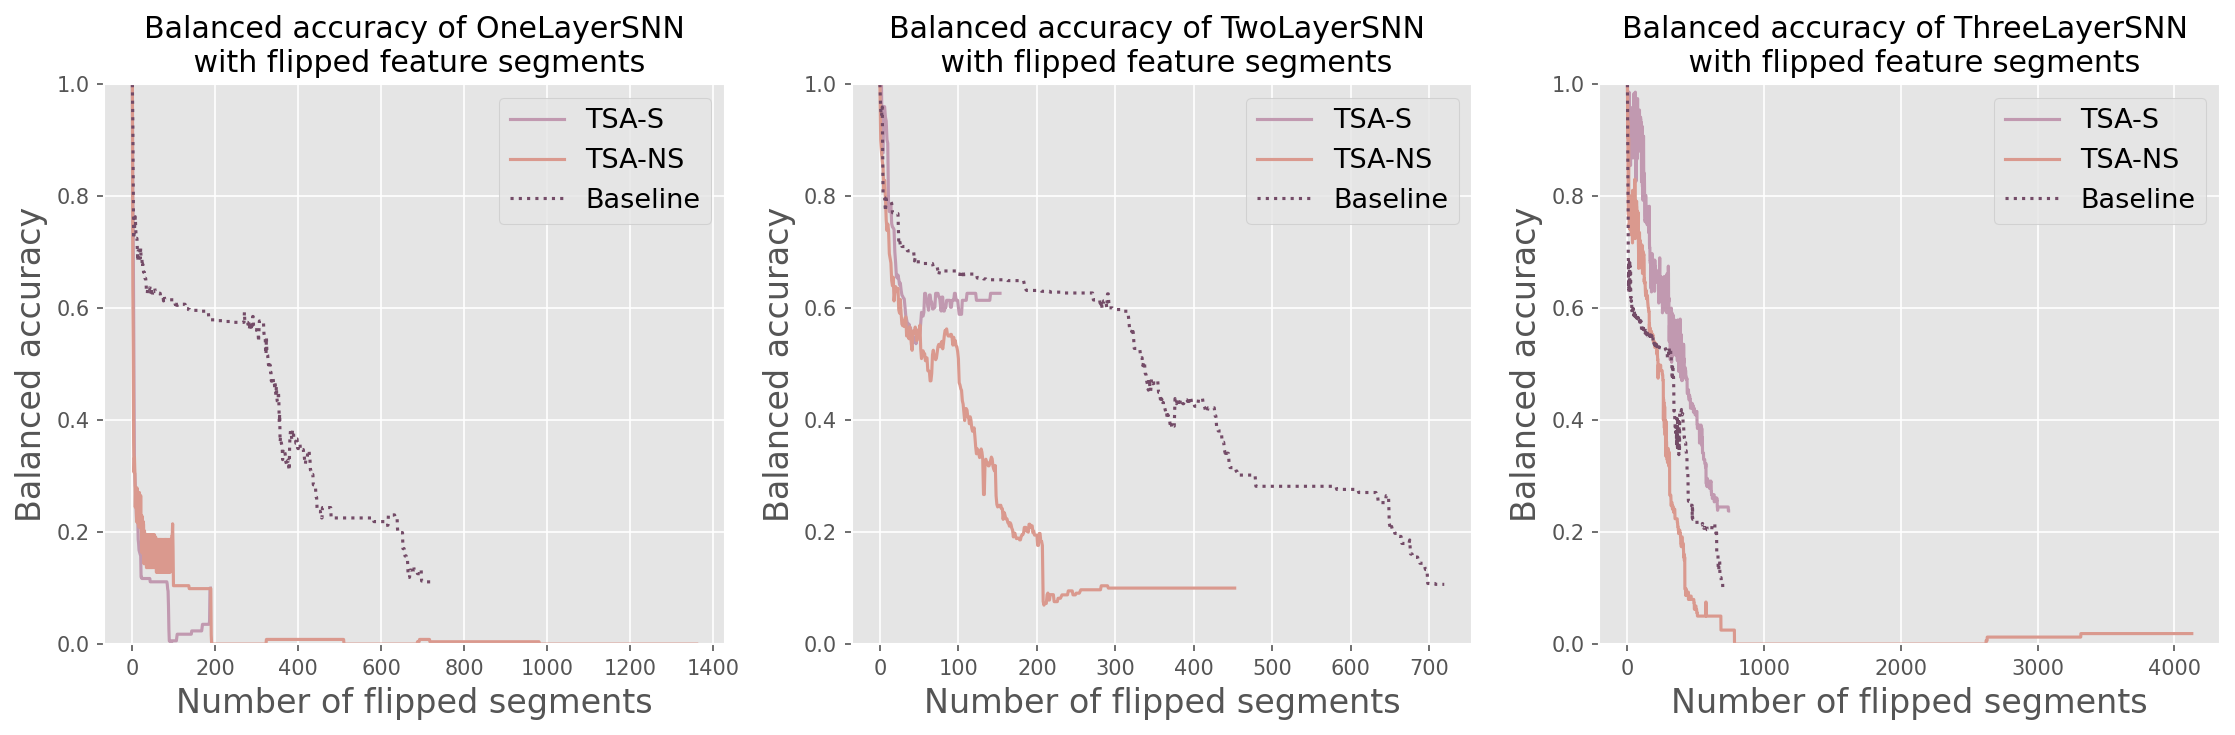

In [13]:
fig = plt.figure(tight_layout=True, dpi=150, frameon=False, figsize=(15,5))
gs = gridspec.GridSpec(1,3)

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(perf_one_yhat_s, color=(194/256, 154/256, 177/256))
ax1.plot(perf_one_yhat_ns, color=(219/256, 154/256, 143/256))
ax1.plot(perf_one_yhat_baseline, color=(115/256, 75/256, 103/256), linestyle='dotted')
ax1.set_ylim(0,1)
ax1.set_ylabel('Balanced accuracy', fontdict={'size': 16})
ax1.set_xlabel('Number of flipped segments', fontdict={'size': 16})
ax1.legend(['TSA-S', 'TSA-NS', 'Baseline'], prop={'size':13})
ax1.set_title('Balanced accuracy of OneLayerSNN\n with flipped feature segments')

ax2 = fig.add_subplot(gs[0,1])
ax2.plot(perf_two_yhat_s, color=(194/256, 154/256, 177/256))
ax2.plot(perf_two_yhat_ns, color=(219/256, 154/256, 143/256))
ax2.plot(perf_two_yhat_baseline, color=(115/256, 75/256, 103/256), linestyle='dotted')
ax2.set_ylim(0,1)
ax2.set_ylabel('Balanced accuracy', fontdict={'size': 16})
ax2.set_xlabel('Number of flipped segments', fontdict={'size': 16})
ax2.legend(['TSA-S', 'TSA-NS', 'Baseline'], prop={'size':13})
ax2.set_title('Balanced accuracy of TwoLayerSNN \n with flipped feature segments')

ax3 = fig.add_subplot(gs[0,2])
ax3.plot(perf_three_yhat_s, color=(194/256, 154/256, 177/256))
ax3.plot(perf_three_yhat_ns, color=(219/256, 154/256, 143/256))
ax3.plot(perf_three_yhat_baseline, color=(115/256, 75/256, 103/256), linestyle='dotted')
ax3.set_ylim(0,1)
ax3.set_ylabel('Balanced accuracy', fontdict={'size': 16})
ax3.set_xlabel('Number of flipped segments', fontdict={'size': 16})
ax3.legend(['TSA-S', 'TSA-NS', 'Baseline'], prop={'size':13})
ax3.set_title('Balanced accuracy of ThreeLayerSNN \n with flipped feature segments')



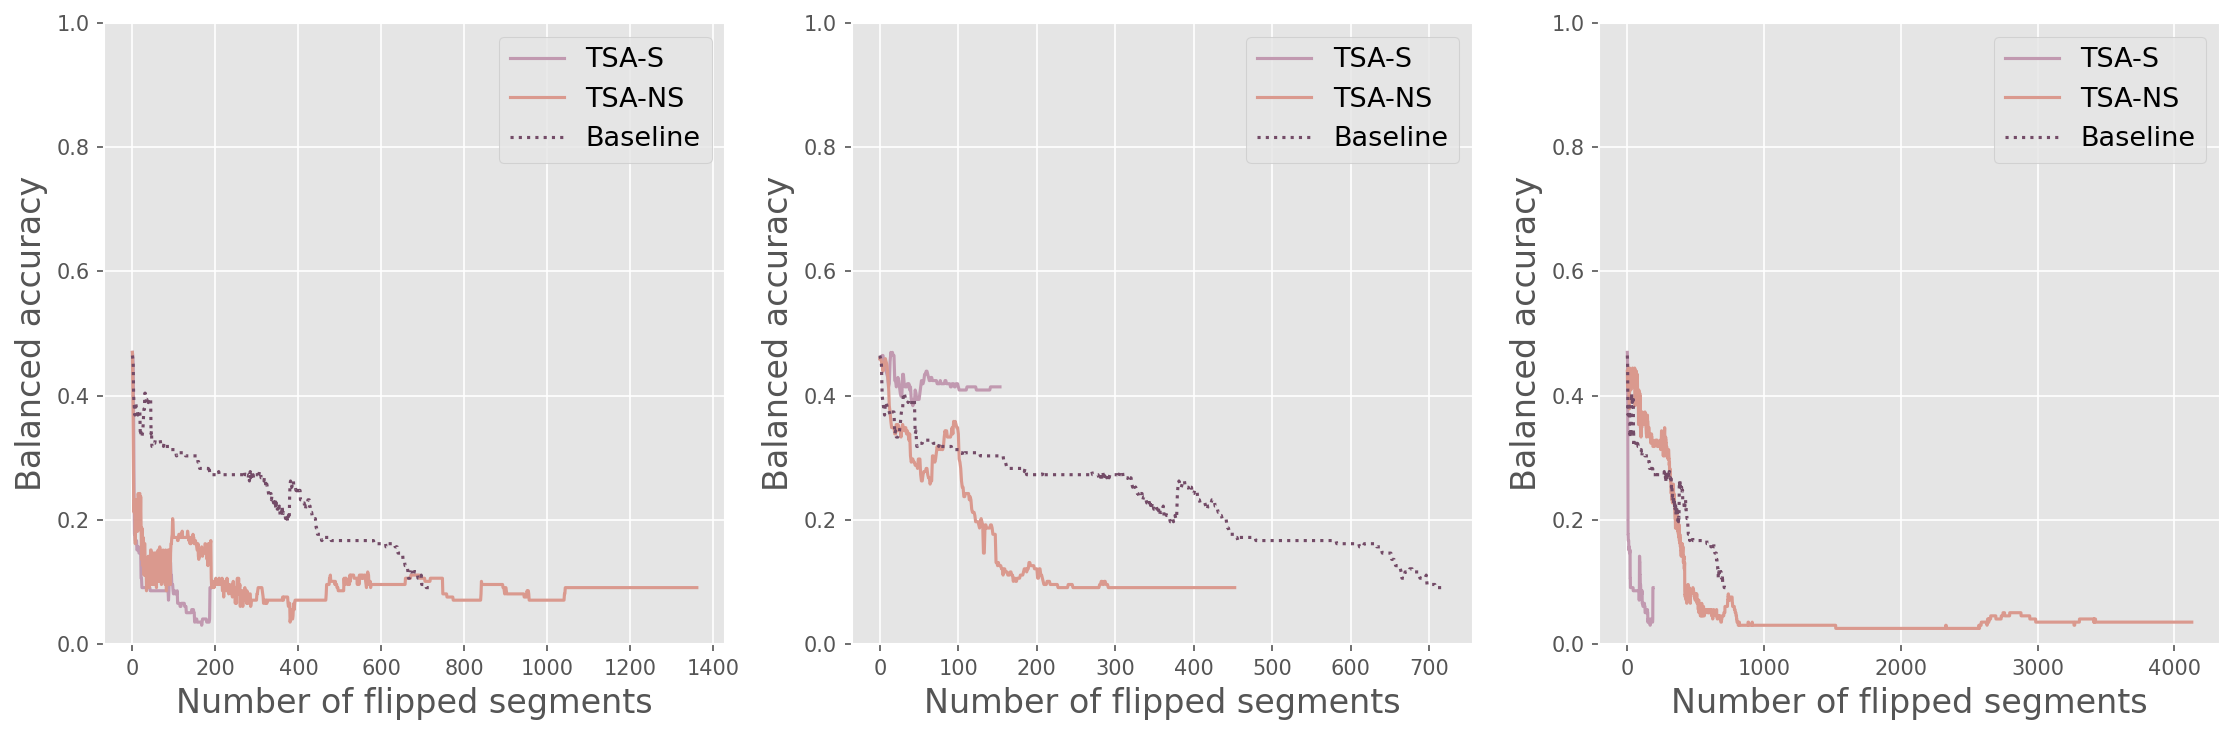

In [12]:
fig = plt.figure(tight_layout=True, dpi=150, frameon=False, figsize=(15,5))
gs = gridspec.GridSpec(1,3)

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(perf_one_ytrue_s, color=(194/256, 154/256, 177/256))
ax1.plot(perf_one_ytrue_ns, color=(219/256, 154/256, 143/256))
ax1.plot(perf_one_ytrue_baseline, color=(115/256, 75/256, 103/256), linestyle='dotted')
ax1.set_ylim(0,1)
ax1.set_ylabel('Balanced accuracy', fontdict={'size': 16})
ax1.set_xlabel('Number of flipped segments', fontdict={'size': 16})
ax1.legend(['TSA-S', 'TSA-NS', 'Baseline'], prop={'size':13})

ax2 = fig.add_subplot(gs[0,1])
ax2.plot(perf_two_ytrue_s, color=(194/256, 154/256, 177/256))
ax2.plot(perf_two_ytrue_ns, color=(219/256, 154/256, 143/256))
ax2.plot(perf_two_ytrue_baseline, color=(115/256, 75/256, 103/256), linestyle='dotted')
ax2.set_ylim(0,1)
ax2.set_ylabel('Balanced accuracy', fontdict={'size': 16})
ax2.set_xlabel('Number of flipped segments', fontdict={'size': 16})
ax2.legend(['TSA-S', 'TSA-NS', 'Baseline'], prop={'size':13})

ax3 = fig.add_subplot(gs[0,2])
ax3.plot(perf_one_ytrue_s, color=(194/256, 154/256, 177/256))
ax3.plot(perf_three_ytrue_ns, color=(219/256, 154/256, 143/256))
ax3.plot(perf_three_ytrue_baseline, color=(115/256, 75/256, 103/256), linestyle='dotted')
ax3.set_ylim(0,1)
ax3.set_ylabel('Balanced accuracy', fontdict={'size': 16})
ax3.set_xlabel('Number of flipped segments', fontdict={'size': 16})
ax3.legend(['TSA-S', 'TSA-NS', 'Baseline'], prop={'size':13})



# Sensitivity

### Read results

In [ ]:
max_sensitivity_s_oneA = load_obj('/sensitivity/tsa-s/max_sensitivity_oneA.pkl')
max_sensitivity_s_oneB = load_obj('/sensitivity/tsa-s/max_sensitivity_oneB.pkl')
max_sensitivity_s_one = max(max_sensitivity_s_oneA, max_sensitivity_s_oneB)

max_sensitivity_s_twoA = load_obj('/sensitivity/tsa-s/max_sensitivity_twoA.pkl')
max_sensitivity_s_twoB = load_obj('/sensitivity/tsa-s/max_sensitivity_twoB.pkl')
max_sensitivity_s_two = max(max_sensitivity_s_twoA, max_sensitivity_s_twoB)

max_sensitivity_s_threeA = load_obj('/sensitivity/tsa-s/max_sensitivity_threeA.pkl')
max_sensitivity_s_threeB = load_obj('/sensitivity/tsa-s/max_sensitivity_threeB.pkl')
max_sensitivity_s_three = max(max_sensitivity_s_threeA, max_sensitivity_s_threeB)

max_sensitivity_ns_oneA = load_obj('/sensitivity/tsa-ns/max_sensitivity_oneA.pkl')
max_sensitivity_ns_oneB = load_obj('/sensitivity/tsa-ns/max_sensitivity_oneB.pkl')
max_sensitivity_ns_one = max(max_sensitivity_ns_oneA, max_sensitivity_ns_oneB)

max_sensitivity_ns_twoA = load_obj('/sensitivity/tsa-ns/max_sensitivity_twoA.pkl')
max_sensitivity_ns_twoB = load_obj('/sensitivity/tsa-ns/max_sensitivity_twoB.pkl')
max_sensitivity_ns_two = max(max_sensitivity_ns_twoA, max_sensitivity_ns_twoB)

max_sensitivity_ns_threeA = load_obj('/sensitivity/tsa-ns/max_sensitivity_threeA.pkl')
max_sensitivity_ns_threeB = load_obj('/sensitivity/tsa-ns/max_sensitivity_threeB.pkl')
max_sensitivity_ns_three = max(max_sensitivity_ns_threeA, max_sensitivity_ns_threeB)

baseline_sensitivity_A = load_obj('/sensitivity/max_sensitivity_baseline_A.pkl')
baseline_sensitivity_B = load_obj('/sensitivity/max_sensitivity_baseline_B.pkl')
max_sensitivity_baseline = max(baseline_sensitivity_A, baseline_sensitivity_B)

### Analyze

In [ ]:
sensitivities_s = [max_sensitivity_s_one, max_sensitivity_s_two, max_sensitivity_s_three]
sensitivities_ns = [max_sensitivity_ns_one, max_sensitivity_ns_two, max_sensitivity_ns_three]
df_sensitivity = pd.DataFrame([sensitivities_s, sensitivities_ns]).transpose()

In [ ]:
df_sensitivity

,0
0,0.85335225
1,0.033294246
2,0.31640348


In [ ]:
max_sensitivity_baseline

array(175.92348, dtype=float32)